<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/IBM_SkillsBuild_IA_325/blob/main/IA_325_py_cod_ex_35_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción del nivel de estrés

## 🌍 Contexto

Los niveles de estrés afectan directamente a la salud física y mental.

En este proyecto, trabajarás como si fueras parte del equipo de desarrollo de un sistema de monitoreo de estrés para deportistas de alto rendimiento o trabajadores en ambientes exigentes.

Se te ha encomendado diseñar un clasificador que, a partir de tres medidas fisiológicas, pueda **predecir el nivel de estrés de una persona**.

Para ello, deberás simular datos realistas, entrenar un modelo de aprendizaje automático y visualizar los resultados.



## 🎯 Objetivos

  + 1.-**Simular** datos fisiológicos (ritmo cardíaco, nivel de cortisol y conductancia de la piel).

  + 2.- **Clasificar** el nivel de estrés de las personas como:
  🔵 Bajo, 🟠 Moderado o 🔴 Alto.

  + 3.-**Entrenar** un clasificador Random Forest.

  + 4.-**Evaluar** el rendimiento del modelo.

  + 5.-**Realizar** predicciones personalizadas.

  + 6.- **Visualizar** los datos y resultados con gráficos interpretables.



##  🛠️ Requisitos Técnicos

Debes usar:

  + NumPy para generar datos.

  + Pandas para manipular estructuras.

  + matplotlib.pyplot para visualizar.

  + sklearn para entrenamiento del modelo y métricas.

  + Programación orientada a objetos (clases bien definidas).



## 👨‍🔬 Parte 1: Clase para representar individuos

  + Atributos:
    + Ritmo cardíaco (heart_rate) en pulsaciones por minuto.
    + Nivel de cortisol (cortisol_level) en µg/dL.
    + Conductancia de la piel (skin_conductance) en µS.
    + Nivel de estrés (stress_level): cadena de texto ('Bajo', 'Moderado' o 'Alto').

  + Métodos
    + to_vector() que devuelva solo las tres primeras variables como lista.



## 🧪 Parte 2: Simulador de datos. Crea una clase StressDataGenerator que genere una lista de objetos Individual con valores aleatorios realistas:

  + Ritmo cardíaco: media 75, desviación estándar 15.

  + Cortisol: media 12, desviación estándar 4.

  + Conductancia: media 5, desviación estándar 1.5.

  + Clasifica los individuos según estas reglas:

    + 🔴 Alto: si cualquiera de las tres medidas supera estos umbrales:

      + Ritmo cardíaco > 90
      + Cortisol > 18
      + Conductancia > 6.5

    + 🟠 Moderado: si alguna supera:

      + Ritmo cardíaco > 70
      + Cortisol > 10
      + Conductancia > 4.5
      + no cumple los criterios de "Alto".

    + 🔵 Bajo: si ninguna medida supera esos valores.



## 🤖 Parte 3: Clasificador con Random Forest.Crea una clase StressClassifier.
  + Métodos:

    + fit(individuals) → entrena el modelo con datos.

    + predict(heart_rate, cortisol, conductance) → devuelve el nivel de estrés estimado.

    + evaluate(test_data) → imprime matriz de confusión e informe de clasificación.



## 🔍 Parte 4: Prueba y predicción personalizada

Genera 300 datos simulados.
Divide el conjunto en entrenamiento y prueba (70%-30%).
Evalúa el modelo con métricas de sklearn.
Predice el estrés de un caso con valores como:

  |Atributo         |valor|
  |-----------------|---- |
  |Ritmo cardíaco:  |95   |
  |Cortisol:        |20   |
  |Conductancia:    |7    |



## 📈 Parte 5: Visualización de los datos

  1.-Usa pandas para convertir los datos simulados a un DataFrame.

  2.- Genera un gráfico de dispersión con matplotlib:<br>
  + Eje X: nivel de cortisol<br>
  + Eje Y: ritmo cardíaco<br>
  + Color de los puntos según el nivel de estrés<br>
      + Verde → Bajo
      + Naranja → Moderado
      + Rojo → Alto
  + Agrega título, leyenda y cuadrícula.<br>



## ✅ Ejemplo de uso
```python
example = StressAnalysisExample()
example.run()
```

## Salida esperada
```python
📊 Matriz de confusión:
[[33  0  0]
 [ 0  2  1]
 [ 0  0 54]]

📝 Informe de clasificación:
              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00        33
        Bajo       1.00      0.67      0.80         3
    Moderado       0.98      1.00      0.99        54

    accuracy                           0.99        90
   macro avg       0.99      0.89      0.93        90
weighted avg       0.99      0.99      0.99        90


🧠 Predicción para individuo personalizado:
  Ritmo cardíaco: 95, Cortisol: 20, Conductancia: 7
  → Nivel estimado de estrés: Alto
  ```

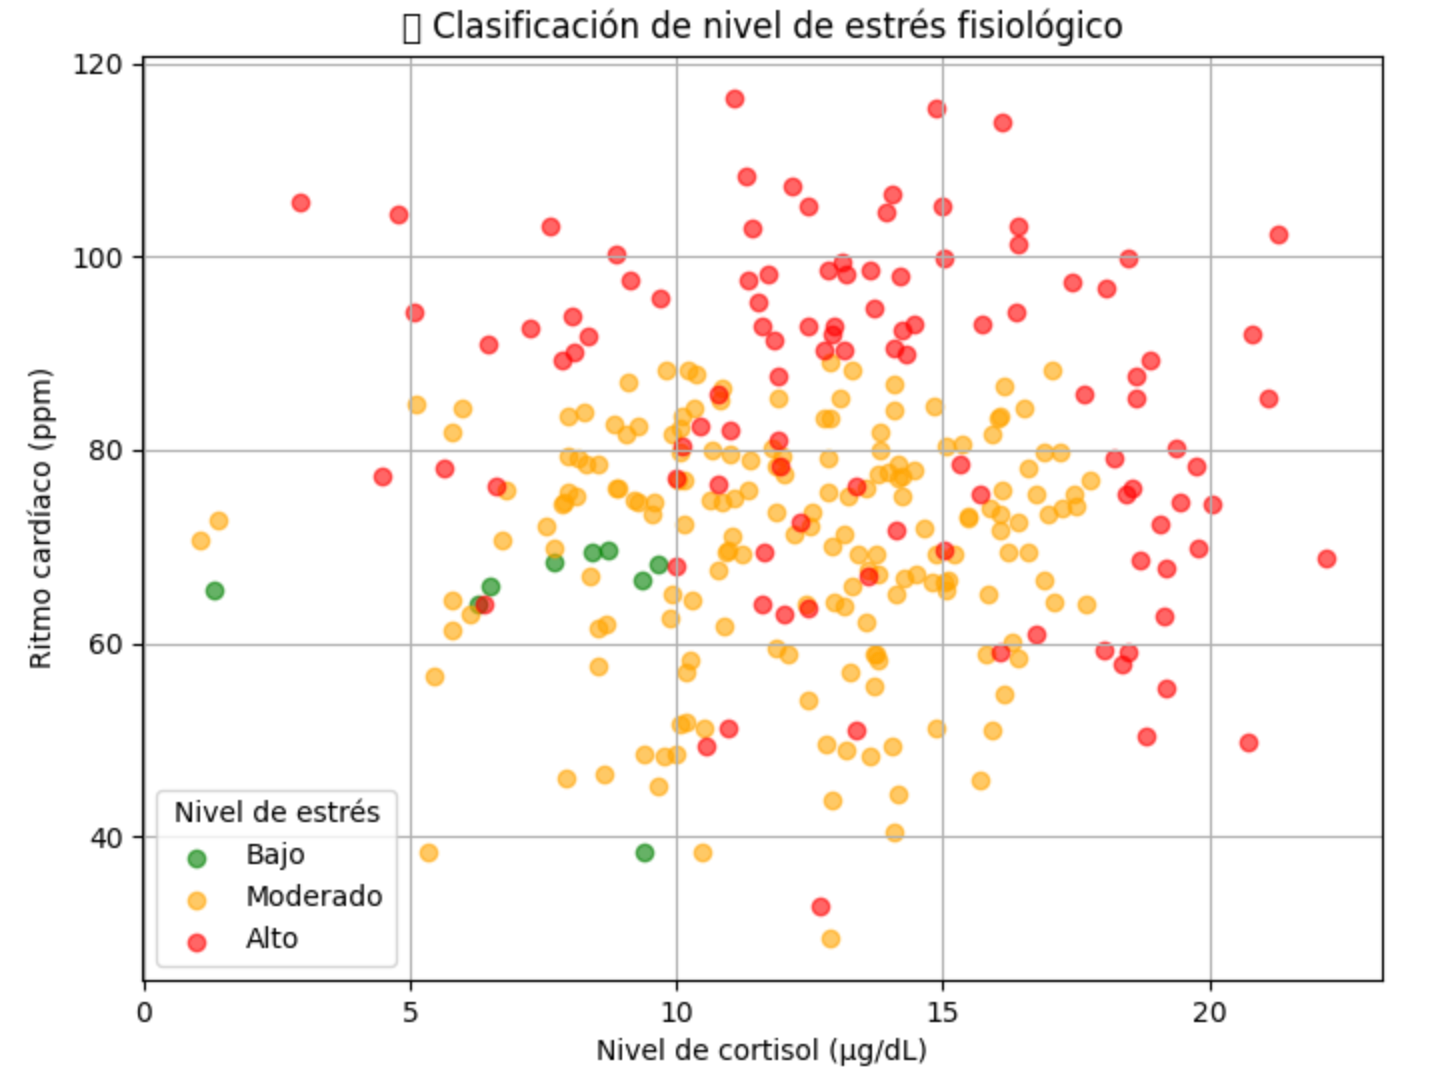

## Importación de librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import unittest

## Definicicón de la clase Individual

In [ ]:
class Individual:
    def __init__(self, heart_rate, cortisol_level, skin_conductance, stress_level:str = None):
      if not isinstance(heart_rate, int) or not isinstance(cortisol_level, int) or not isinstance(skin_conductance, (int, float)):
        raise ValueError("Los valores de los atributos deben ser enteros.")
      if heart_rate < 0 or cortisol_level < 0 or skin_conductance < 0:
        print(heart_rate, cortisol_level, skin_conductance)
        raise ValueError("Los valores de los atributos no pueden ser negativos.")
      if stress_level is not None and stress_level not in ["Bajo", "Moderado", "Alto"]:
        raise ValueError("El nivel de estrés debe ser 'Bajo', 'Moderado' o 'Alto'.")
      self.heart_rate = heart_rate
      self.cortisol_level = cortisol_level
      self.skin_conductance = skin_conductance
      self.stress_level = stress_level
    def __str__(self):
      return f"Ritmo cardiaco: {self.heart_rate}, Cortisol: {self.cortisol_level}, Conductancia: {self.skin_conductance}"
    def to_vector(self):
      return [self.heart_rate, self.cortisol_level, self.skin_conductance]

#### Tests para la clase Individual

In [ ]:
class TestIndividualClass(unittest.TestCase):

    def test_individual_attributes(self):
        """Test that Individual object is created with correct attributes."""
        individual = Individual(heart_rate=70, cortisol_level=10, skin_conductance=4, stress_level='Bajo')
        self.assertEqual(individual.heart_rate, 70)
        self.assertEqual(individual.cortisol_level, 10)
        self.assertEqual(individual.skin_conductance, 4)
        self.assertEqual(individual.stress_level, 'Bajo')

    def test_to_vector_method(self):
        """Test that to_vector method returns the correct list."""
        individual = Individual(heart_rate=85, cortisol_level=15, skin_conductance=6, stress_level='Alto')
        self.assertEqual(individual.to_vector(), [85, 15, 6])

    def test_to_vector_method_with_different_values(self):
        """Test that to_vector method works with different values."""
        individual = Individual(heart_rate=100, cortisol_level=25, skin_conductance=8, stress_level='Alto')
        self.assertEqual(individual.to_vector(), [100, 25, 8])

    def test_to_vector_method_with_negative_values(self):
        """Test that to_vector method works with different values."""
        with self.assertRaises(ValueError):
          individual = Individual(heart_rate=(-100), cortisol_level=25, skin_conductance=8.0, stress_level='Alto')
        with self.assertRaises(ValueError):
          individual = Individual(heart_rate=100, cortisol_level=(-25), skin_conductance=8.0, stress_level='Alto')
        with self.assertRaises(ValueError):
          individual = Individual(heart_rate=100, cortisol_level=25, skin_conductance=-8.0, stress_level='Alto')
        with self.assertRaises(ValueError):
          individual = Individual(heart_rate=100, cortisol_level=25, skin_conductance=8.0, stress_level='Moderada')

In [ ]:
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

....
----------------------------------------------------------------------
Ran 4 tests in 0.006s

OK


-100 25 8.0
100 -25 8.0
100 25 -8.0


## Definición de la clase StressDataGenerator

In [ ]:
class StressDataGenerator:
    def __init__(self, num_individuals=100):
      self.num_individuals = num_individuals
    def generate(self):
      individuals = []
      for _ in range(self.num_individuals):
        heart_rate = int(np.random.normal(75,10))
        invalido = True
        while invalido:
          cortisol_level = int(np.random.normal(12,4))
          invalido = (cortisol_level < 0)
        invalido = True
        while invalido:
          skin_conductance = np.random.normal(5,1.5)
          invalido = (skin_conductance < 0)

        if 90 < heart_rate or 18 < cortisol_level or 6.5 < skin_conductance:
          stress_level = "Alto"
        elif 70 < heart_rate or 10 < cortisol_level or 4.5 < skin_conductance:
          stress_level = "Moderado"
        else:
          stress_level = "Bajo"
        individual = Individual(heart_rate, cortisol_level, skin_conductance, stress_level)
        individuals.append(individual)
      return individuals

In [ ]:
sdg = StressDataGenerator()
individuals = sdg.generate()


## Definición de la clase StressClassifier

In [ ]:
class StressClassifier:
    def __init__(self):
      self.scaler = None
      self.model = None
    def fit(self, individuals):

      X = np.array([individual.to_vector() for individual in individuals])
      y = np.array([individual.stress_level for individual in individuals])
      self.scaler = StandardScaler()
      X_scaled = self.scaler.fit_transform(X)
      self.model = RandomForestClassifier(n_estimators=100, random_state=42)
      self.model.fit(X_scaled, y)
    def evaluate(self, individuals):
      X = np.array([individual.to_vector() for individual in individuals])
      y = np.array([individual.stress_level for individual in individuals])
      X_scaled = self.scaler.fit_transform(X)
      y_pred = self.model.predict(X_scaled)

      print("📊 Matriz de confusión:")
      print(confusion_matrix(y, y_pred))
      print("\n📊 Informe de clasificación:")
      print(classification_report(y, y_pred))
    def predict(self, hr, cort, cond):
      #X_test = np.array(individual.to_vector()).reshape(1, -1)
      X_test_scaled = self.scaler.transform([[hr, cort, cond]])
      prediction = self.model.predict(X_test_scaled)
      return prediction[0]

In [ ]:
sc = StressClassifier()
individuals = sdg.generate()
train, test = train_test_split(individuals, test_size=0.3, random_state=42)
sc.fit(train)
sc.evaluate(test)

📊 Matriz de confusión:
[[ 5  1]
 [ 1 23]]

📊 Informe de clasificación:
              precision    recall  f1-score   support

        Alto       0.83      0.83      0.83         6
    Moderado       0.96      0.96      0.96        24

    accuracy                           0.93        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.93      0.93      0.93        30



## Definición de la clase StressAnalysisExample

"""
Asegurar una división equilibrada de los datos: Al dividir tus datos en
conjuntos de entrenamiento y prueba, puedes usar la estrategia stratify con
train_test_split de scikit-learn. Esto asegura que la proporción de cada clase
en el conjunto de entrenamiento sea la misma que en el conjunto de prueba
"""

In [ ]:
class StressAnalysisExample:
    def run(self):
      sdg = StressDataGenerator(300)
      individuals = sdg.generate()
      train, test = train_test_split(individuals, test_size=0.3, \
                                     random_state=42)
      sc = StressClassifier()
      sc.fit(train)
      sc.evaluate(test)
      nuevo_individuo = Individual(95, 20, 7.0)
      prediccion =sc.predict(95, 20, 7.0)
      print("🧠 Predicción para individuo personalizado:")
      print(nuevo_individuo)
      print(f"→ Nivel estimado de estrés: {prediccion}")
      plt.figure(figsize=(8, 6))
      #diccionario de colores para las categorías
      colores = { 'Bajo':'green', 'Moderado':'orange','Alto':'red'}

      # dibujamos los datos de entrenamiento y sus leyendas
      for i in individuals:
          plt.scatter(i.cortisol_level, i.heart_rate, color=colores[i.stress_level])

      # dibujamos el nuevo dato
      plt.scatter(x=nuevo_individuo.cortisol_level, y=nuevo_individuo.heart_rate, c='blue', marker='*', s=100, label='Individuo buscado')


      for stress, color in colores.items():
          plt.scatter([], [], c=color, label=stress) # Crear marcadores "fantasma" para la leyenda

      plt.xlabel('Nivel de cortisol (ug/dL)')
      plt.ylabel('RItmo cardiaco (ppm)')
      plt.title('Clasificación de nivel de strés fisiologico')

      # bautizamos la etiqueta
      plt.legend(title='Nivel de estrés', loc='lower left') # Posicionar a la izquierda y añadir título
      plt.show()



## Ejemplo de uso

📊 Matriz de confusión:
[[21  0  0]
 [ 0  9  0]
 [ 1  0 59]]

📊 Informe de clasificación:
              precision    recall  f1-score   support

        Alto       0.95      1.00      0.98        21
        Bajo       1.00      1.00      1.00         9
    Moderado       1.00      0.98      0.99        60

    accuracy                           0.99        90
   macro avg       0.98      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90

🧠 Predicción para individuo personalizado:
Ritmo cardiaco: 95, Cortisol: 20, Conductancia: 7.0
→ Nivel estimado de estrés: Alto


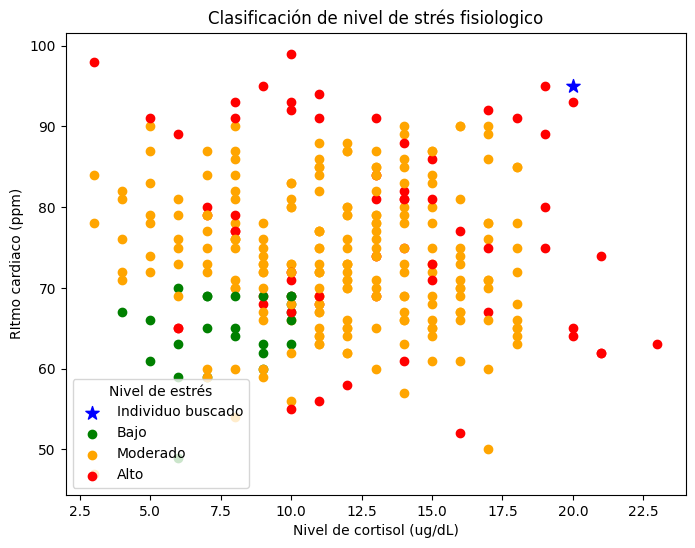

In [ ]:
example = StressAnalysisExample()
example.run()
